In [1]:
from collections import Counter

import torch

import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from natsort import natsorted
import logomaker

from netam import framework
from dnsmex import dxsm_data
from dnsmex.dnsm_oe import write_sites_oe
from dnsmex.local import localify

figures_dir = localify("FIGURES_DIR")

In [2]:
dataset_name = "v1rodriguez"

Loading /home/wdumm/data/v3/rodriguez-airr-seq-race-prod-NoWinCheck_igh_pcp_2024-11-12_MASKED_NI_noN_no-naive.csv.gz
Filtering out problematic pairs of sample_id and clonal families [('sample-igg-SC-18', '440')]
Loading model
Loading model ThriftyHumV0.2-59
Using cached models: /home/wdumm/dnsm-netam-proj/netam/netam/_pretrained/thrifty-0.2.0.zip


Evaluating model: 100%|██████████| 2176/2176 [00:06<00:00, 359.23it/s]


Loading branch lengths


Calculating model predictions: 100%|██████████| 22/22 [03:18<00:00,  9.02s/it]


Preparing heavy chain plot data
ANARCI seq length mismatch! sample-igg-SC-13 2013
ANARCI seq length mismatch! sample-igg-SC-15 925
Invalid IMGT insertion: 68.1 sample-igg-SC-18 440
ANARCI seq length mismatch! sample-igg-SC-19 1803
IMGT mismatch with CDR annotation! sample-igg-W-25 4
IMGT mismatch with CDR annotation! sample-igg-W-19 41
Invalid IMGT insertion: 119.1 sample-igg-W-37 140
IMGT mismatch with CDR annotation! sample-igg-W-37 1
Invalid IMGT insertion: 119.1 sample-igg-W-3 17
Invalid IMGT insertion: 119.1 sample-igg-W-34 200


Calculating model predictions: 100%|██████████| 6/6 [00:51<00:00,  8.58s/it]


Computing site substitution probabilities dataframe...
Computing site substitution probabilities dataframe...
Computing site substitution probabilities dataframe...


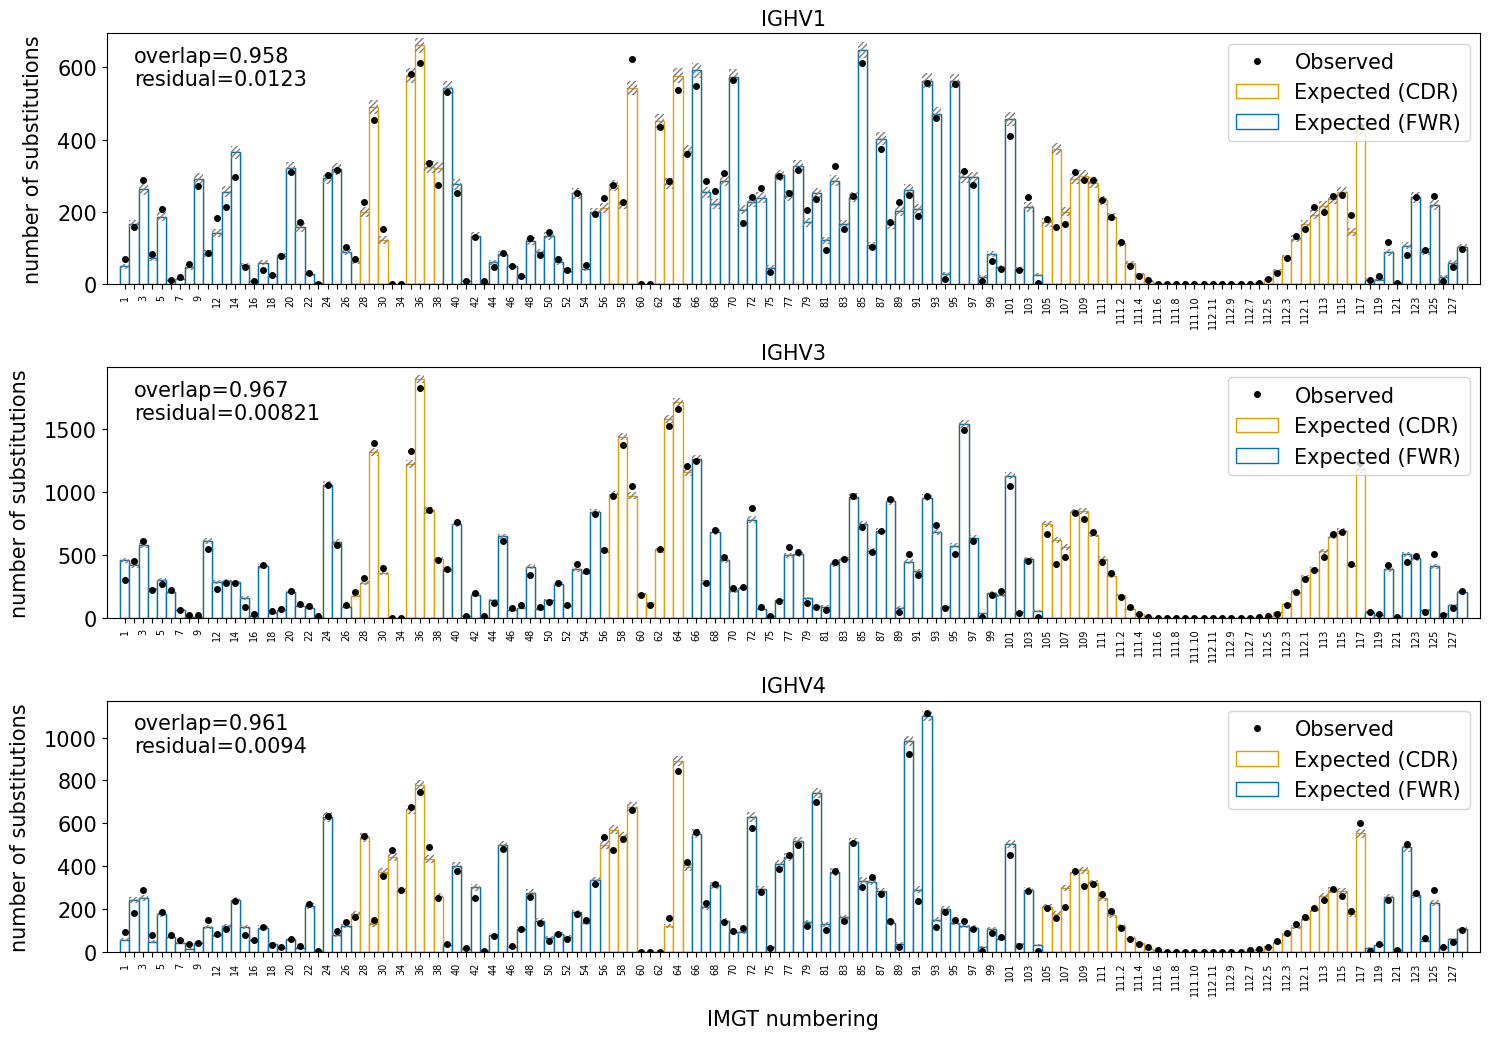

In [3]:
model_name = "dnsm_1m-v1jaffe+v1tang-joint"

crepe_prefix = localify(f"DNSM_TRAINED_MODELS_DIR/{model_name}")
test_output_prefix = localify(f"DNSM_TEST_OUTPUT_DIR/{model_name}-ON-{dataset_name}")

complete_plotter, plotter_dict = write_sites_oe(
    crepe_prefix=crepe_prefix,
    dataset_name=dataset_name,
    branch_length_path=f"{test_output_prefix}.branch_lengths_csv",
    csv_output_path=f"{test_output_prefix}-sites-oe.csv",
    fig_out_path=f"{figures_dir}/sites-oe-V1,3,4.svg",
    min_log_prob=-4,
    replace_title=True,
)
complete_plotter = complete_plotter["heavy"]

Loading /home/wdumm/data/v3/rodriguez-airr-seq-race-prod-NoWinCheck_igh_pcp_2024-11-12_MASKED_NI_noN_no-naive.csv.gz
Filtering out problematic pairs of sample_id and clonal families [('sample-igg-SC-18', '440')]
Loading model
Loading model ThriftyHumV0.2-59
Using cached models: /home/wdumm/dnsm-netam-proj/netam/netam/_pretrained/thrifty-0.2.0.zip


Evaluating model: 100%|██████████| 2176/2176 [00:04<00:00, 456.08it/s]


Loading branch lengths


Calculating model predictions: 100%|██████████| 22/22 [00:06<00:00,  3.47it/s]


Preparing heavy chain plot data
ANARCI seq length mismatch! sample-igg-SC-13 2013
ANARCI seq length mismatch! sample-igg-SC-15 925
Invalid IMGT insertion: 68.1 sample-igg-SC-18 440
ANARCI seq length mismatch! sample-igg-SC-19 1803
IMGT mismatch with CDR annotation! sample-igg-W-25 4
IMGT mismatch with CDR annotation! sample-igg-W-19 41
Invalid IMGT insertion: 119.1 sample-igg-W-37 140
IMGT mismatch with CDR annotation! sample-igg-W-37 1
Invalid IMGT insertion: 119.1 sample-igg-W-3 17
Invalid IMGT insertion: 119.1 sample-igg-W-34 200


Calculating model predictions: 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]


Computing site substitution probabilities dataframe...
Computing site substitution probabilities dataframe...
Computing site substitution probabilities dataframe...


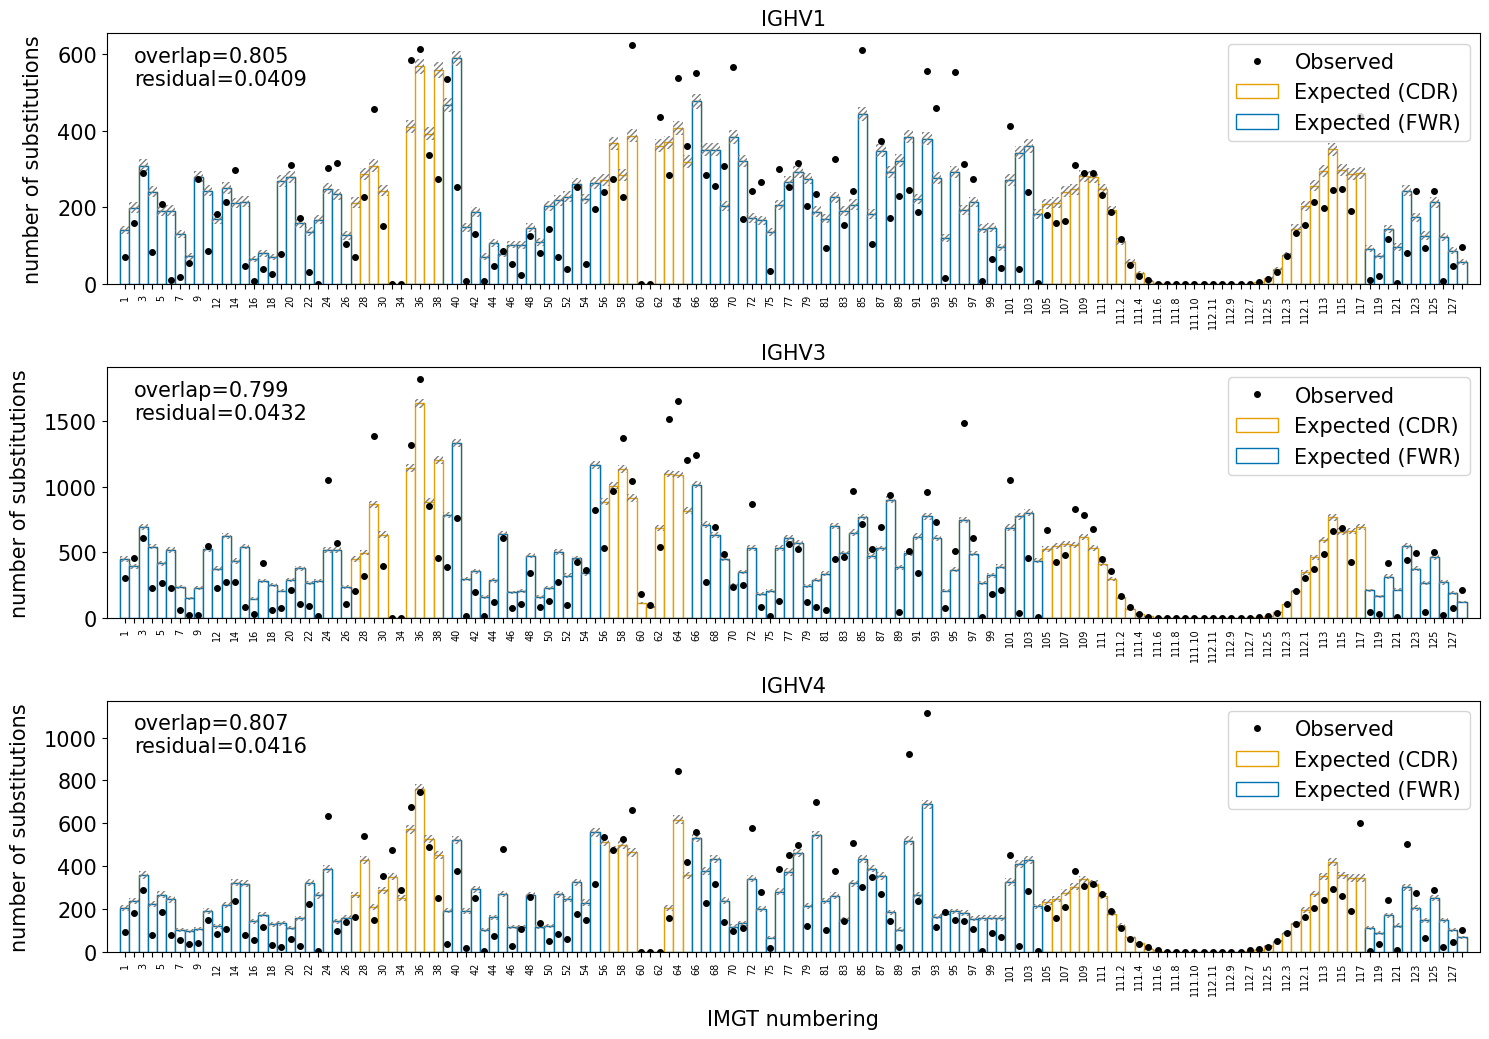

In [4]:
baseline_model_name = "single-v1jaffe+v1tang-joint"

crepe_prefix = localify(f"DNSM_TRAINED_MODELS_DIR/{baseline_model_name}")
test_output_prefix = localify(f"DNSM_TEST_OUTPUT_DIR/{baseline_model_name}-ON-{dataset_name}")

_ = write_sites_oe(
    crepe_prefix=crepe_prefix,
    dataset_name=dataset_name,
    branch_length_path=f"{test_output_prefix}.branch_lengths_csv",
    csv_output_path=f"{test_output_prefix}-baseline-sites-oe.csv",
    fig_out_path=f"{figures_dir}/baseline-sites-oe-V1,3,4.svg",
    min_log_prob=-4,
    replace_title=True,
)

Now we see what happens if we don't have any selection factor at all, which corresponds to a `single` model with log selection factor set to 0.

In [5]:
neutral_crepe = framework.load_crepe(crepe_prefix)
neutral_crepe.model.single_value.data = torch.tensor(0.0)
neutral_crepe_prefix = crepe_prefix.replace("single", "neutral")
neutral_crepe.save(neutral_crepe_prefix)

Loading /home/wdumm/data/v3/rodriguez-airr-seq-race-prod-NoWinCheck_igh_pcp_2024-11-12_MASKED_NI_noN_no-naive.csv.gz
Filtering out problematic pairs of sample_id and clonal families [('sample-igg-SC-18', '440')]
Loading model
Loading model ThriftyHumV0.2-59
Using cached models: /home/wdumm/dnsm-netam-proj/netam/netam/_pretrained/thrifty-0.2.0.zip


Evaluating model: 100%|██████████| 2176/2176 [00:04<00:00, 495.37it/s]


Calculating model predictions: 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]


Preparing heavy chain plot data
ANARCI seq length mismatch! sample-igg-SC-13 2013
ANARCI seq length mismatch! sample-igg-SC-15 925
Invalid IMGT insertion: 68.1 sample-igg-SC-18 440
ANARCI seq length mismatch! sample-igg-SC-19 1803
IMGT mismatch with CDR annotation! sample-igg-W-25 4
IMGT mismatch with CDR annotation! sample-igg-W-19 41
Invalid IMGT insertion: 119.1 sample-igg-W-37 140
IMGT mismatch with CDR annotation! sample-igg-W-37 1
Invalid IMGT insertion: 119.1 sample-igg-W-3 17
Invalid IMGT insertion: 119.1 sample-igg-W-34 200


Calculating model predictions: 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]


Computing site substitution probabilities dataframe...
Computing site substitution probabilities dataframe...
Computing site substitution probabilities dataframe...


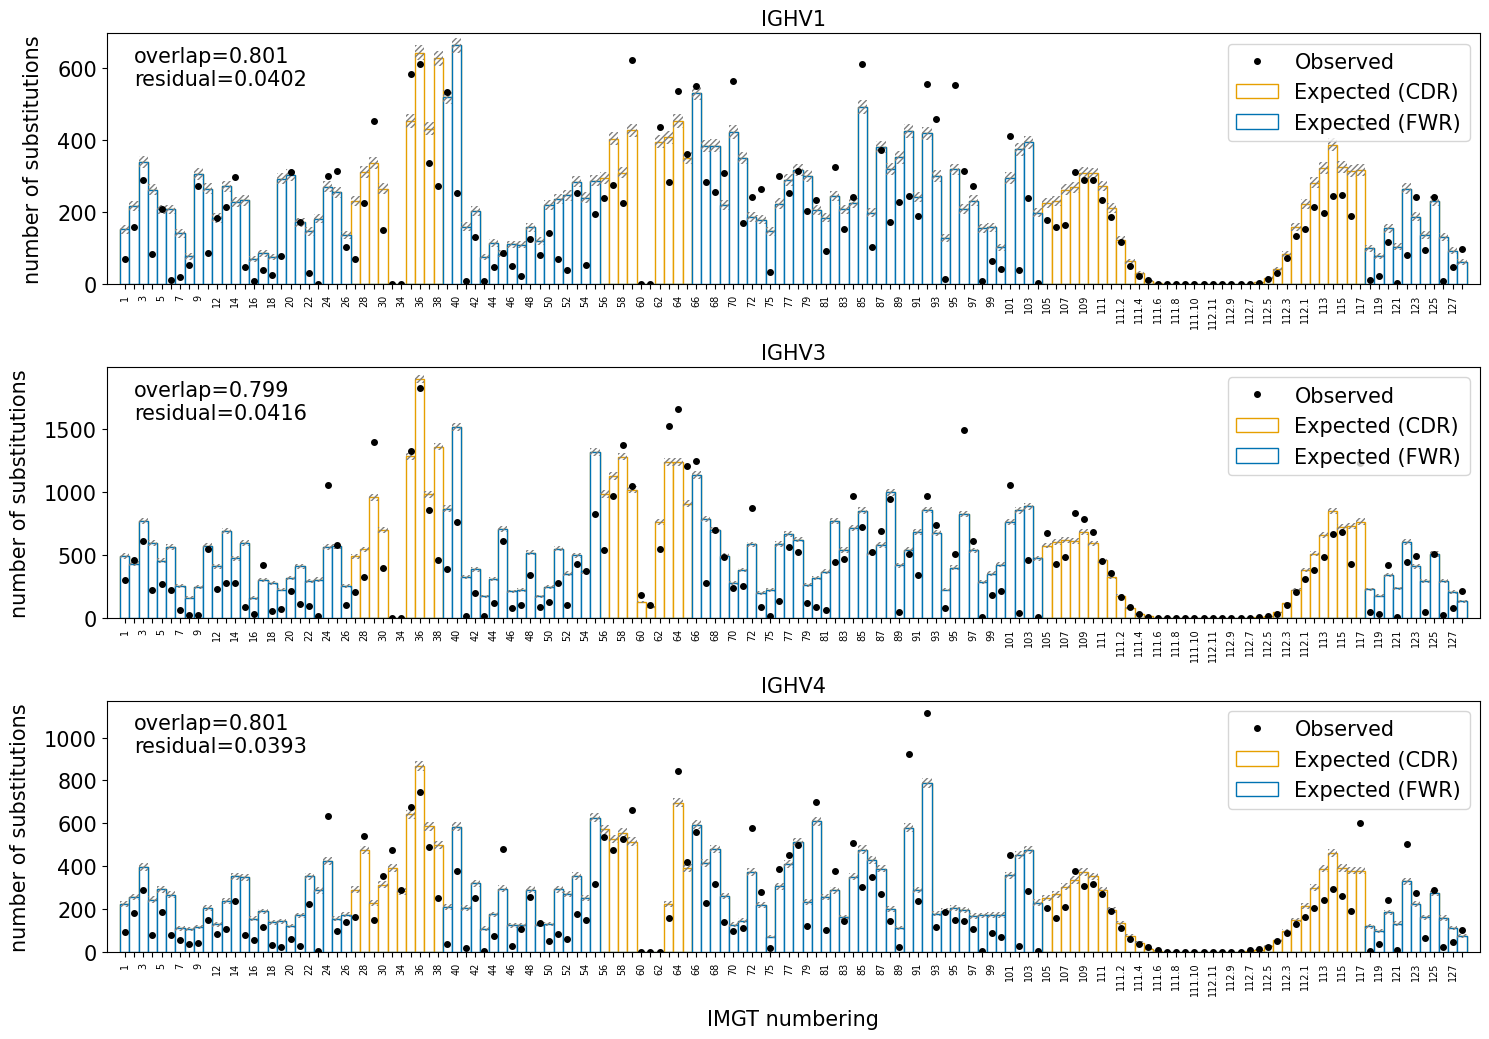

In [6]:
neutral_model_name = "neutral-v1jaffe+v1tang-joint"

crepe_prefix = localify(f"DNSM_TRAINED_MODELS_DIR/{neutral_model_name}")
test_output_prefix = localify(f"DNSM_TEST_OUTPUT_DIR/{neutral_model_name}-ON-{dataset_name}")

_ = write_sites_oe(
    crepe_prefix=crepe_prefix,
    dataset_name=dataset_name,
    branch_length_path=None,
    csv_output_path=f"{test_output_prefix}-neutral-sites-oe.csv",
    fig_out_path=f"{figures_dir}/neutral-sites-oe-V1,3,4.svg",
    min_log_prob=-4,
    replace_title=True,
)

### Comparing selection factors and mutation frequencies between V3 and V4

In [7]:
plotterV3, plotterV4 = plotter_dict["IGHV3"], plotter_dict["IGHV4"]

In [8]:
def site_sub_probs_df_without_low_freq(in_plotter, quantile_cutoff=0.05):
    site_sub_probs_df = in_plotter.site_sub_probs_df.copy()
    site_counts = site_sub_probs_df["site"].value_counts()
    cutoff = site_counts.quantile(quantile_cutoff)
    sites_above_cutoff = set(site_counts[site_counts > cutoff].index)
    site_sub_probs_df = site_sub_probs_df[site_sub_probs_df["site"].isin(sites_above_cutoff)]
    return site_sub_probs_df

In [9]:
def sort_df_by_site(df):
    sorted_index = natsorted(df.index, key=lambda x: df.loc[x, 'site'])
    return df.iloc[sorted_index]

def build_persite_df(site_sub_probs_df):
    persite_df = site_sub_probs_df.groupby(['site', 'is_cdr']).agg(
        mean_prob=('prob', 'mean'),
        mean_neutral_prob=('neutral_prob', 'mean'),
        mean_selection_factor=('selection_factor', 'mean'),
        mut_freq=('mutation', 'mean')
    ).reset_index()

    persite_df = sort_df_by_site(persite_df)

    return persite_df

persiteV3 = build_persite_df(site_sub_probs_df_without_low_freq(plotterV3))
persiteV4 = build_persite_df(site_sub_probs_df_without_low_freq(plotterV4))

common_sites = set(persiteV3["site"]) & set(persiteV4["site"])

# restrict persiteV3 and persiteV4 to common sites
persiteV3_common = persiteV3[persiteV3["site"].isin(common_sites)]
persiteV4_common = persiteV4[persiteV4["site"].isin(common_sites)]

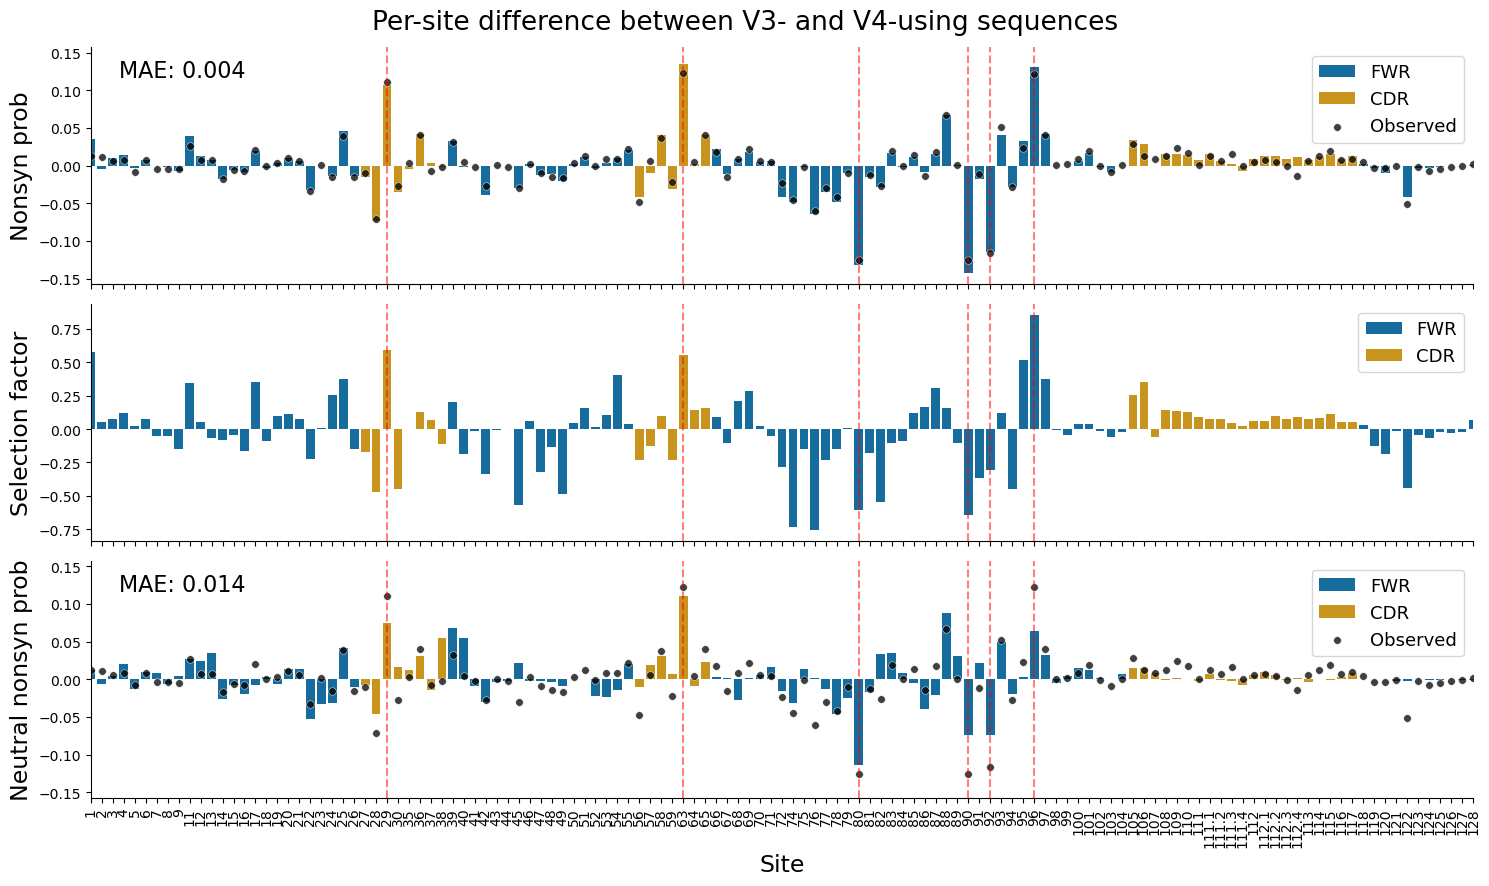

In [10]:
fwr_color="#0072B2"
cdr_color="#E69F00"
region_color = {"FWR": fwr_color, "CDR": cdr_color}

plt.rcParams['legend.fontsize'] = 13

def plot_persite(df):
    df["region"] = df["is_cdr"].map({False: "FWR", True: "CDR"})
    fig, axs = plt.subplots(3, 1, figsize=(15, 3*3), sharex=True)

    # Use the same yrange for axs[0] and axs[2]
    yrange_lim = 1.1 * max(df["mean_prob"].abs().max(), df["mean_neutral_prob"].abs().max())
    axs[0].set_ylim(-yrange_lim, yrange_lim)
    axs[2].set_ylim(-yrange_lim, yrange_lim)

    # Plot mean_prob as barplot with hue based on is_cdr
    sns.barplot(
        data=df,
        x='site',
        y='mean_prob',
        hue='region',
        palette=region_color,
        ax=axs[0],
        dodge=False,
    )

    sns.barplot(
        data=df,
        x='site',
        y='mean_selection_factor',
        hue='region',
        palette=region_color,
        ax=axs[1],
        dodge=False,
    )

    sns.barplot(
        data=df,
        x='site',
        y='mean_neutral_prob',
        hue='region',
        palette=region_color,
        ax=axs[2],
        dodge=False,
    )

    for ax_idx in [0, 2]:
        sns.scatterplot(
            data=df,
            x='site',
            y='mut_freq',
            color='black',
            ax=axs[ax_idx],
            s=30,  # size of points
            label='Observed',
            alpha=0.75,
        )

    full_mae = (df["mean_prob"] - df["mut_freq"]).abs().mean()
    axs[0].text(0.02, 0.95, f"MAE: {full_mae:.3f}", transform=axs[0].transAxes, fontsize=16, verticalalignment='top')
    
    neutral_mae = (df["mean_neutral_prob"] - df["mut_freq"]).abs().mean()
    axs[2].text(0.02, 0.95, f"MAE: {neutral_mae:.3f}", transform=axs[2].transAxes, fontsize=16, verticalalignment='top')

    axs[2].tick_params(axis='x', rotation=90)
    axs[2].set_xlabel("Site", fontsize=17)

    x_min, x_max = df.iloc[0]["site"], df.iloc[-1]["site"]
    for ax in axs:
        ax.set_xlim(x_min, x_max)
        legend = ax.get_legend()
        legend.set_title(None)

    df["abs_mean_prob"] = df["mean_prob"].abs()
    top_sites_prob = diff_df.sort_values("abs_mean_prob", ascending=False).head(6)["site"].tolist()

    y_axis_labels = ["Nonsyn prob", "Selection factor", "Neutral nonsyn prob"]
    for idx, ax in enumerate(axs):
        ax.set_ylabel(y_axis_labels[idx], fontsize=17)
        for site in top_sites_prob:
            ax.axvline(site, color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    sns.despine()

    return fig


diff_df = sort_df_by_site((persiteV3_common.set_index(["site", "is_cdr"]) - persiteV4_common.set_index(["site", "is_cdr"])).reset_index())
diff_df = diff_df.dropna()
diff_df.to_csv(f"{test_output_prefix}-sites-V3-V4-diff.csv", index=False)

fig = plot_persite(diff_df)
fig.suptitle("Per-site difference between V3- and V4-using sequences", fontsize=19)
plt.tight_layout()

fig.savefig(f"{figures_dir}/sites-oe-diff-V3,4.svg")

In [11]:
diff_df.set_index(["site"]).loc["63"]

is_cdr                       True
mean_prob                 0.13486
mean_neutral_prob        0.111264
mean_selection_factor    0.553937
mut_freq                 0.122359
region                        CDR
abs_mean_prob             0.13486
Name: 63, dtype: object

This seems counter-intuitive but consider:

* `mean_prob` is $E[p_j f_j]$
* `mean_neutral_prob` is $E[p_j]$
* `mean_selection_factor` is $E[f_j]$

Let's look at these things before taking the difference.

In [12]:
tmp = pd.concat([persiteV3_common.set_index(["site"]).loc["63"], persiteV4_common.set_index(["site"]).loc["63"]], axis=1)
# rename columns
tmp.columns = ["V3", "V4"]
tmp

,V3,V4
is_cdr,True,True
mean_prob,0.157929,0.023069
mean_neutral_prob,0.173341,0.062077
mean_selection_factor,0.915139,0.361202
mut_freq,0.152512,0.030153


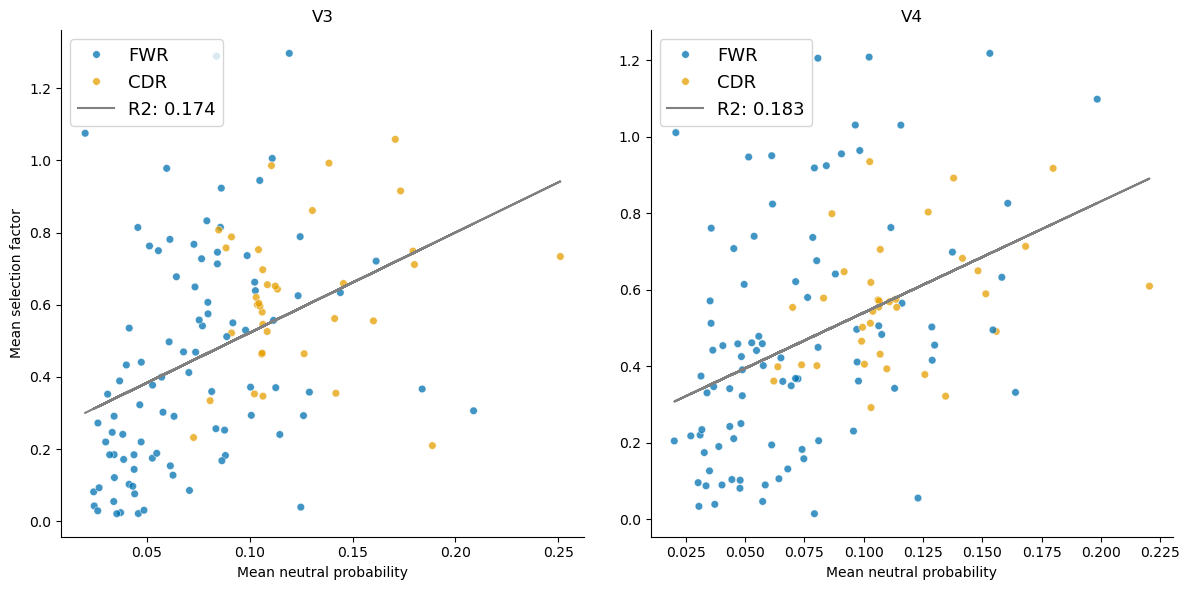

In [13]:
def plot_mutability_vs_selection(df, ax):
    df = df.copy()
    df["region"] = df["is_cdr"].map({False: "FWR", True: "CDR"})
    region_color = {"FWR": fwr_color, "CDR": cdr_color}
    sns.scatterplot(
        data=df,
        x='mean_neutral_prob',
        y='mean_selection_factor',
        hue='region',
        palette=region_color,
        ax=ax,
        s=30,  # size of points
        alpha=0.75,
    )
    # calculate R2
    X = df["mean_neutral_prob"].values.reshape(-1, 1)
    y = df["mean_selection_factor"].values
    reg = LinearRegression().fit(X, y)
    r2 = reg.score(X, y)
    ax.plot(X, reg.predict(X), color='gray', label=f"R2: {r2:.3f}")
    ax.legend(loc='upper left')
    ax.set_xlabel("Mean neutral probability")
    ax.set_ylabel("Mean selection factor")
    plt.tight_layout()
    sns.despine()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_mutability_vs_selection(persiteV3_common, axs[0])
axs[0].set_title("V3")
plot_mutability_vs_selection(persiteV4_common, axs[1])
axs[1].set_title("V4")
axs[1].set_ylabel(None)

fig.savefig(f"{figures_dir}/mutability-vs-selection-V3,4.svg")

### If we just look at the selection factors, which sites differ a lot between V3 and V4?

In [14]:
diff_df["abs_mean_selection_factor"] = diff_df["mean_selection_factor"].abs()
epistatic_sites = diff_df.sort_values("abs_mean_selection_factor", ascending=False).head(10)["site"].tolist()
epistatic_sites = natsorted(epistatic_sites)

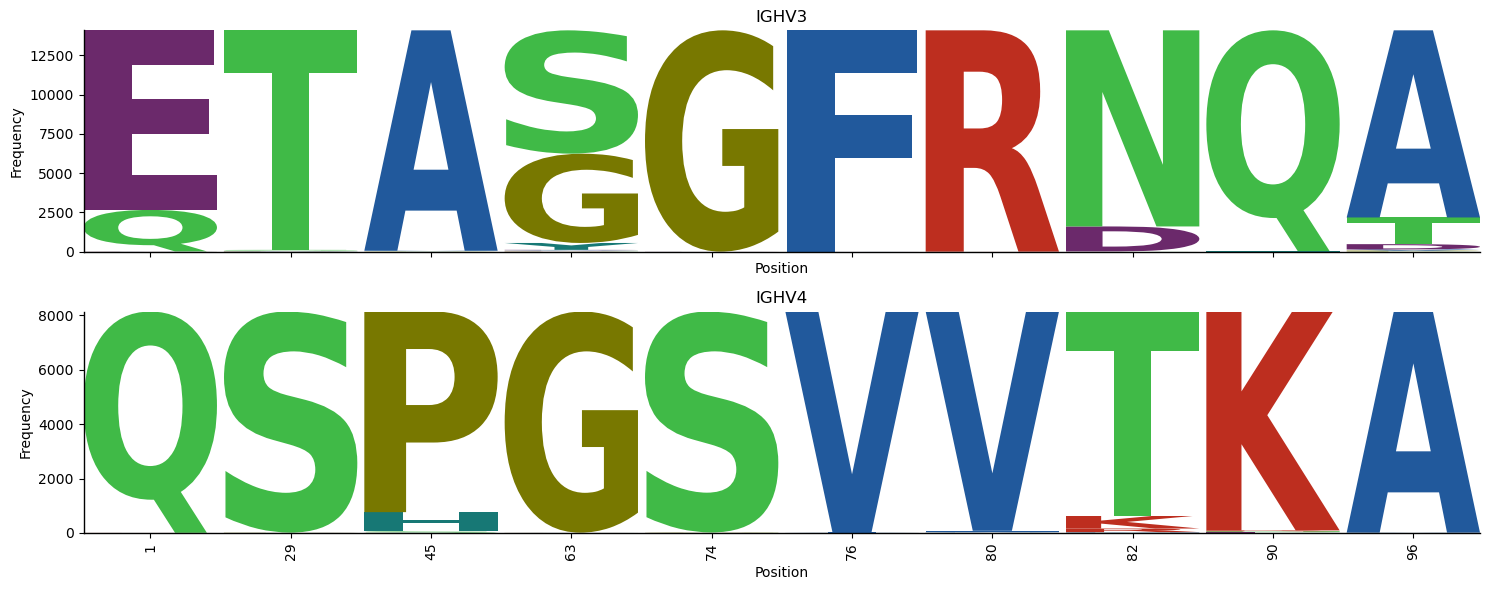

In [15]:
anarci_df = pd.read_csv(dxsm_data.anarci_dict[dataset_name]["heavy"])
all_sites = [col for col in anarci_df.columns if col[0].isdigit()]

def logoplot_from_df(df, ax):
    # Flatten the DataFrame into a list of sequences
    sequences = df.apply(lambda row: ''.join(row), axis=1).tolist()

    # Create a count matrix from the sequences
    count_matrix = logomaker.alignment_to_matrix(sequences, to_type='counts')

    # Create a logo plot using the count matrix
    logo = logomaker.Logo(count_matrix, ax=ax, color_scheme='NajafabadiEtAl2017')

    # Customize the plot
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left', 'bottom'], visible=True)

    # Set x-axis labels to be the column names of the DataFrame
    ax.set_xticks(range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=90)

    logo.ax.set_xlabel('Position')
    logo.ax.set_ylabel('Frequency')

    return logo

anarci_df["v_family"] = anarci_df["v_gene"].str.split("-", expand=True)[0]
families_of_interest = ["IGHV3", "IGHV4"]
# make a dict of anarci_df for each family of interest
anarci_dict = {family: anarci_df[anarci_df["v_family"] == family] for family in families_of_interest}

sites = epistatic_sites
width = 15

# sites = all_sites
# width = 60

fig, axs = plt.subplots(len(anarci_dict), 1, figsize=(width, 3*len(anarci_dict)), sharex=True)

for idx, (family, df) in enumerate(anarci_dict.items()):
    logoplot_from_df(df[sites], axs[idx])
    axs[idx].set_title(family)

plt.tight_layout()

### Overall plot of selection factor for Rodriguez dataset

In [16]:
for plotter in plotter_dict.values():
    for colname in ["neutral_prob", "selection_factor", "prob"]:
        plotter.site_sub_probs_df[colname] = plotter.site_sub_probs_df[colname].apply(lambda it: it.item())
for colname in ["neutral_prob", "selection_factor", "prob"]:
    complete_plotter.site_sub_probs_df[colname] = complete_plotter.site_sub_probs_df[colname].apply(lambda it: it.item())


Computing site substitution probabilities dataframe...


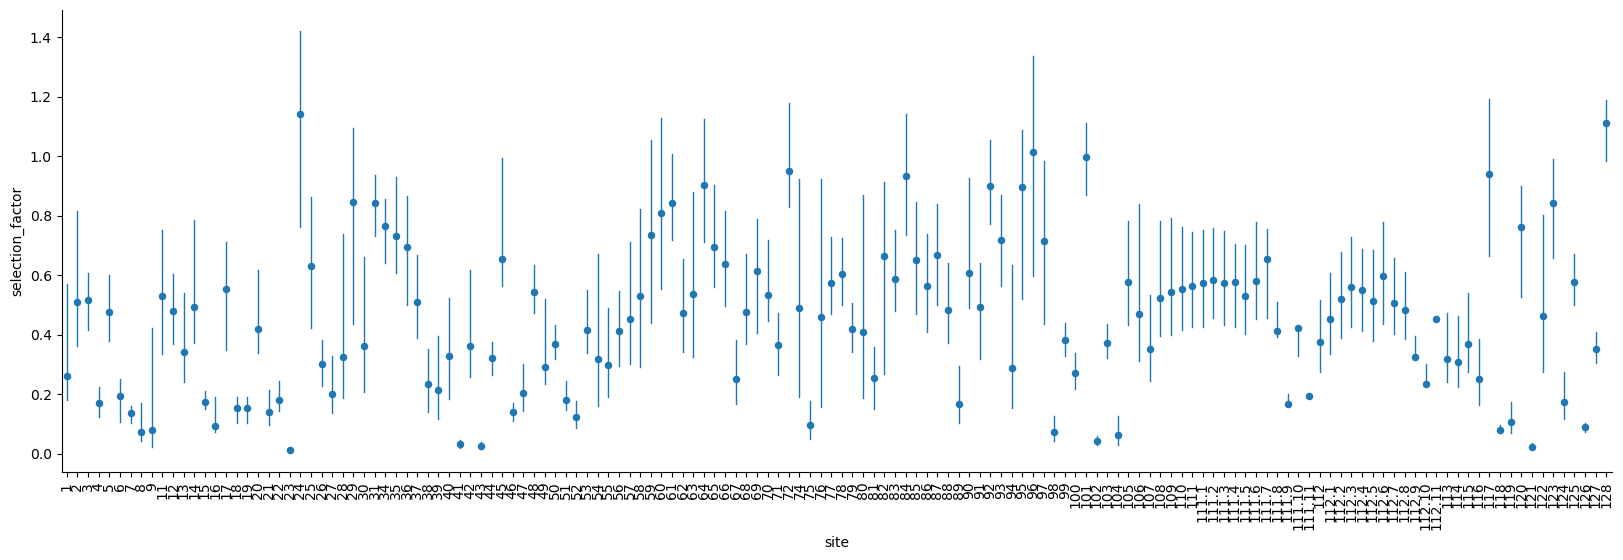

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.pointplot(data=complete_plotter.site_sub_probs_df, x="site", y="selection_factor", errorbar=("pi", 50), ax=ax, linestyle='none', markers='.', estimator=np.median, err_kws={'linewidth': 1})
ax.tick_params(axis='x', rotation=90)
sns.despine()

In [18]:
complete_plotter.site_sub_probs_df

,neutral_prob,selection_factor,prob,mutation,pcp_index,site,is_cdr,parent_codon,parent_aa,child_codon,child_aa
0,0.102066,0.132334,0.013507,False,0,1,False,CAG,Q,CAG,Q
123,0.030019,0.132334,0.003972,False,1,1,False,CAG,Q,CAG,Q
246,0.011072,0.229902,0.002546,False,2,1,False,CAG,Q,CAG,Q
364,0.054606,0.262477,0.014333,False,3,1,False,CAG,Q,CAG,Q
483,0.010781,0.262477,0.002830,False,4,1,False,CAG,Q,CAG,Q
...,...,...,...,...,...,...,...,...,...,...,...
2648299,0.001440,1.122413,0.001617,False,21747,128,False,TCA,S,TCA,S
2648416,0.001785,1.077277,0.001923,False,21748,128,False,TCA,S,TCA,S
2648533,0.001744,1.077277,0.001879,False,21749,128,False,TCA,S,TCA,S
2648652,0.001797,1.249783,0.002246,False,21750,128,False,TCA,S,TCA,S


In [33]:
anarci_df = pd.read_csv(dxsm_data.anarci_dict[dataset_name]["heavy"])
all_sites = [col for col in anarci_df.columns if col[0].isdigit()]
anarci_sites_df = anarci_df[all_sites]
# get most common AA per column in anarci_sites_df
most_common_aas = anarci_sites_df.apply(lambda col: col.value_counts().idxmax())

per_site_medians = complete_plotter.site_sub_probs_df[["neutral_prob", "selection_factor", "prob", "mutation", "pcp_index", "site", "is_cdr"]].groupby("site").median()
per_site_medians = per_site_medians.sort_values("selection_factor")
conserved_sites = per_site_medians.head(15).index

conserved_aa_series = most_common_aas.loc[conserved_sites]

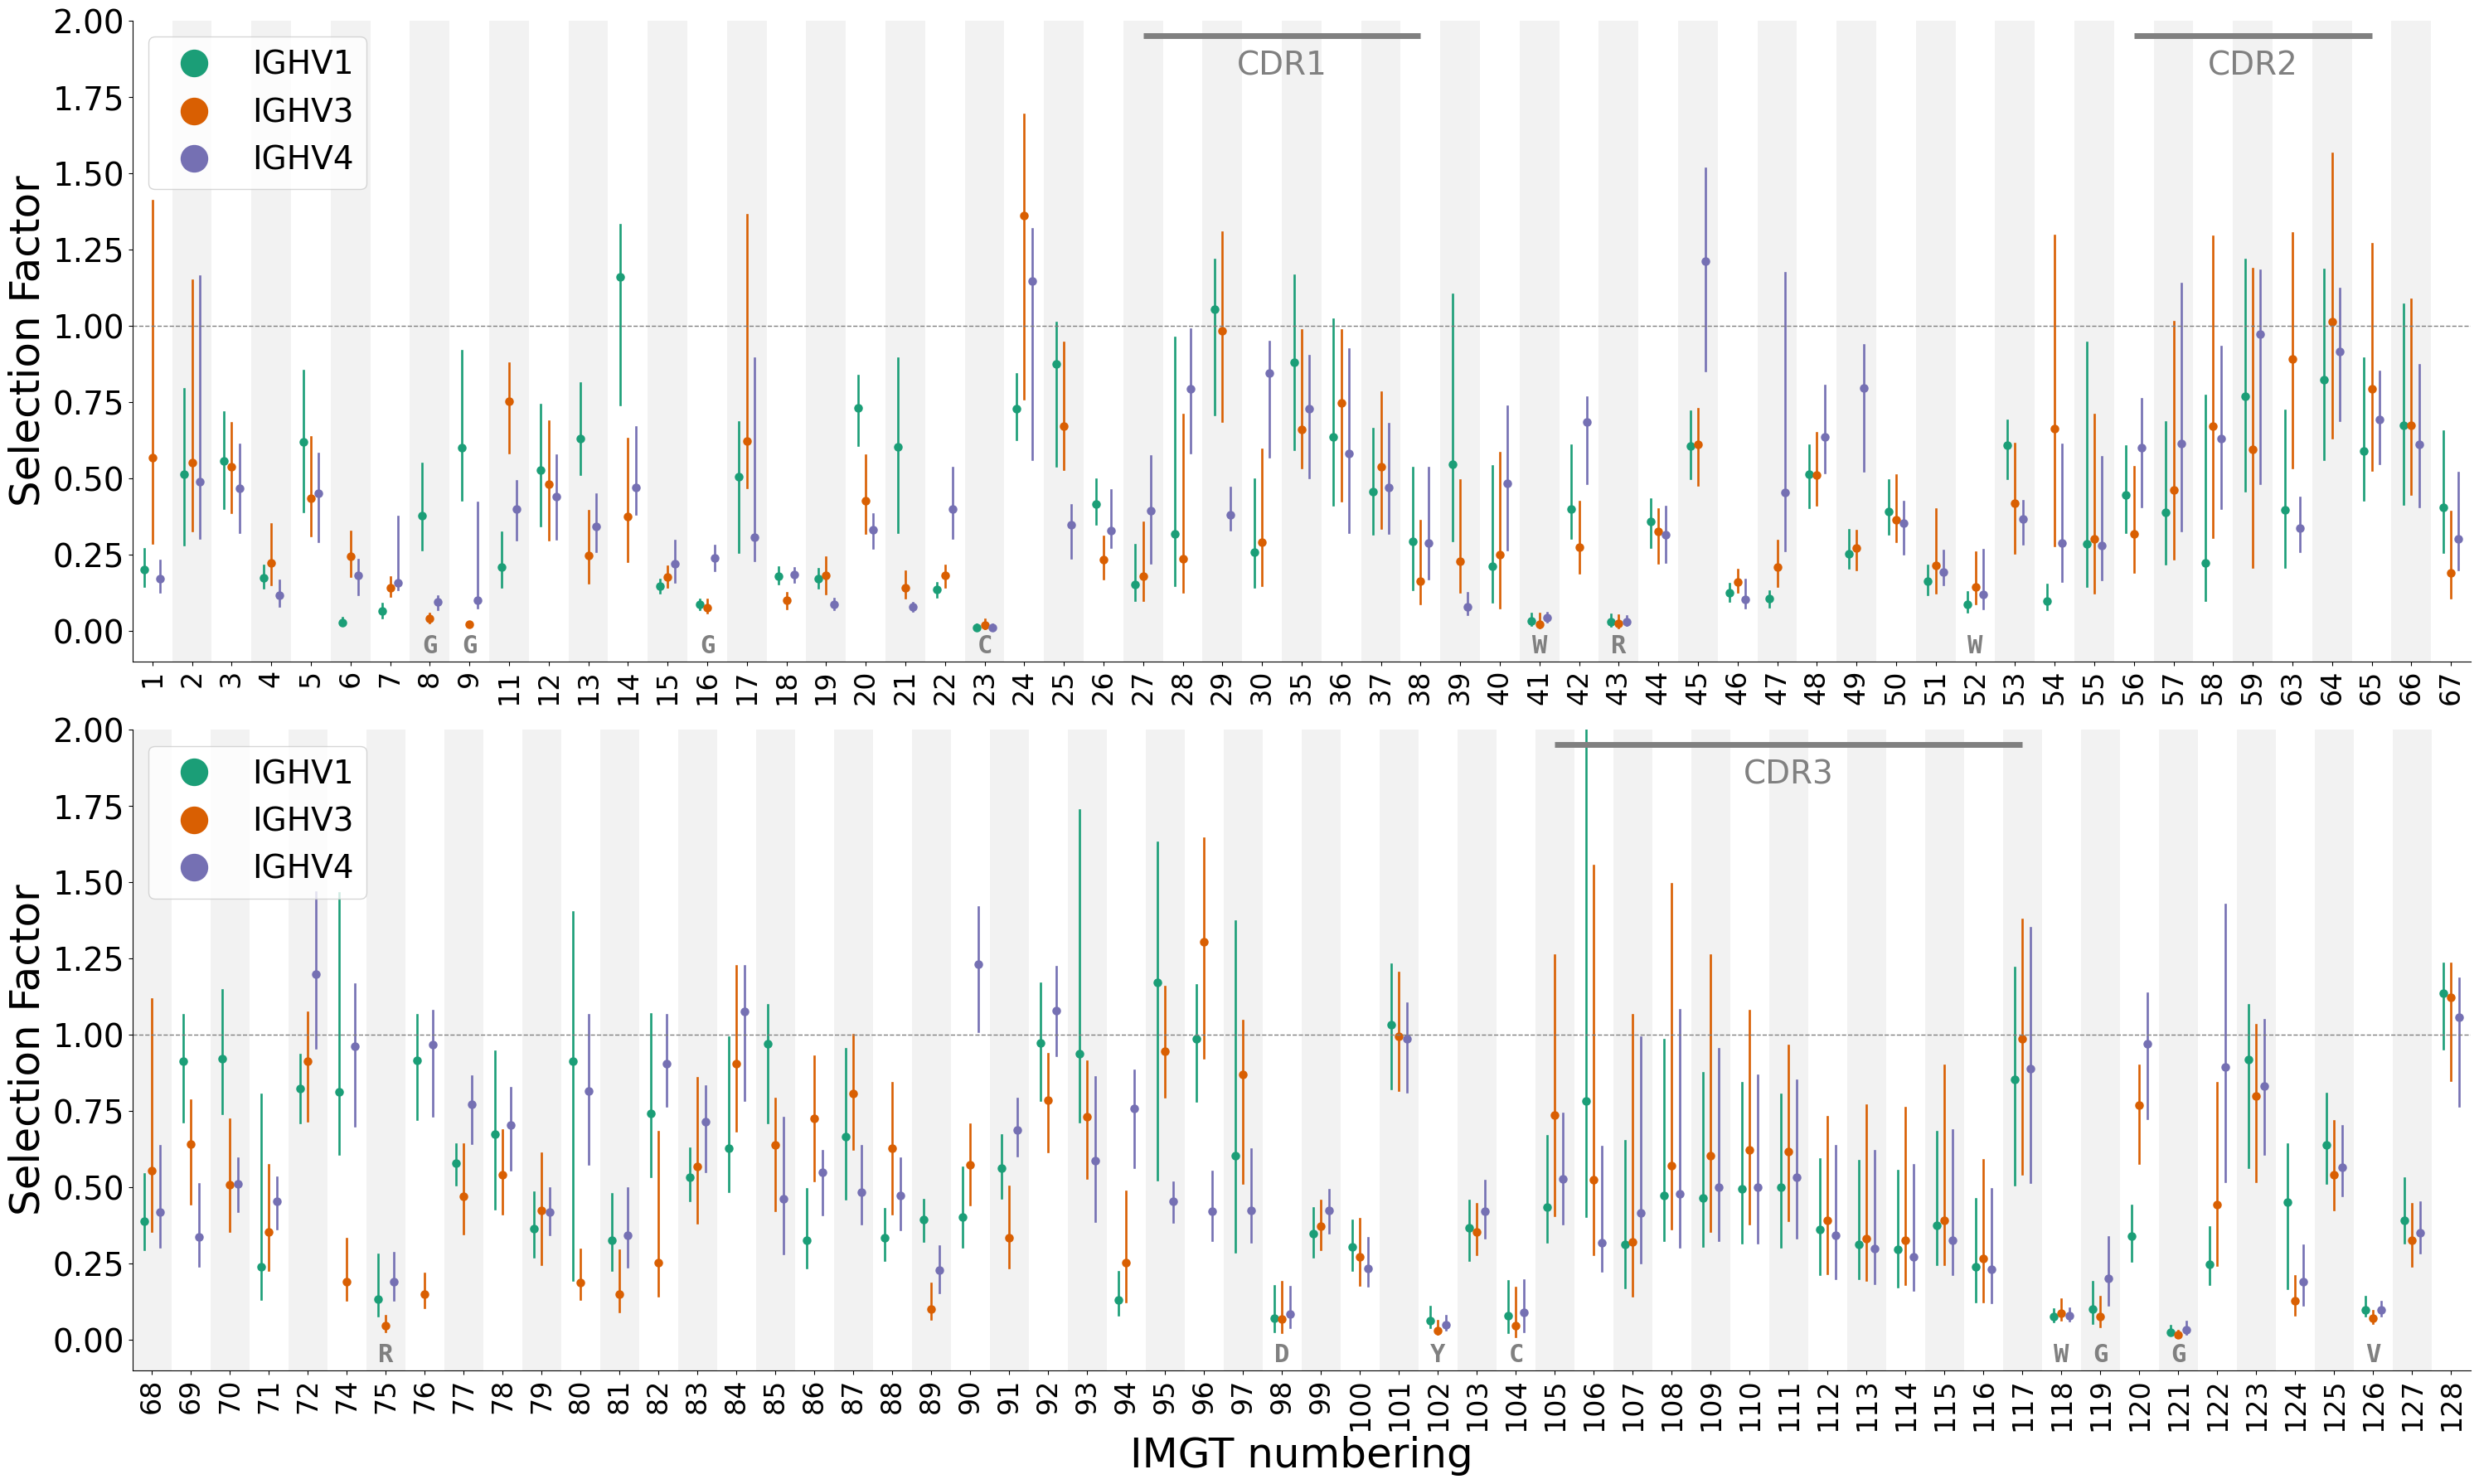

In [34]:
def plot_selection_landscape(ax, df, conserved_aa_series, mode="all", y_max=2.0):
    """
    Plots the landscape of selection factors on the given axis.

    Parameters:
    - ax: matplotlib axis object
    - df: DataFrame containing the data to plot
    - conserved_aa_series: Series containing conserved amino acids
    - mode: str, one of "all", "first_half", or "second_half"
      - "all": plot all data
      - "first_half": plot the first half of the data
      - "second_half": plot the second half of the data
    - cdr_y_pos: y position of the CDR bars
    """
    palette = plt.get_cmap('Dark2').colors

    # Determine the range of sites to plot based on the mode
    unique_sites = df["site"].unique()
    site_offset = 0
    if mode == "first_half":
        half_index = len(unique_sites) // 2
        df = df[df["site"].isin(unique_sites[:half_index])]
        site_range = range(half_index)
    elif mode == "second_half":
        half_index = len(unique_sites) // 2
        df = df[df["site"].isin(unique_sites[half_index:])]
        site_range = range(half_index, len(unique_sites))
        site_offset = - half_index
    else:  # mode == "all"
        site_range = range(len(unique_sites))

    # Plot the pointplot with string x-axis labels
    sns.pointplot(data=df, x="site", y="selection_factor", hue="vh_family_sorted", linestyle='none', 
                  dodge=0.39, palette=palette, markers='.', errorbar=('pi', 75), 
                  estimator=np.median, err_kws={'linewidth': 1.9}, ms=11, ax=ax)
 
    # Add shaded vertical regions
    for i in site_range:
        offset_i = i + site_offset
        if i % 2 == 1:
            ax.axvspan(offset_i - 0.5, offset_i + 0.5, color='grey', alpha=0.1, lw=0)

    # Customize tick labels
    ax.tick_params(axis='x', which='both', labelsize=24, rotation=90)
    ax.tick_params(axis='y', which='both', labelsize=28)

    ax.set_xlim(-0.5, len(site_range) - 0.5)
    ax.set_ylim(-0.1, y_max)

    # Add horizontal dashed line at y=1
    ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)

    # Customize legend and move it down to fit the CDR bars
    ax.legend(loc='upper left', fontsize=28, markerscale=4)#, bbox_to_anchor=(0, -0.2))

    # Set labels
    ax.set_xlabel('IMGT numbering', fontsize=36)
    if mode == "first_half":
        ax.set_xlabel('')
    ax.set_ylabel('Selection Factor', fontsize=36)

    # Remove the top and right spines
    sns.despine(ax=ax)

    for site, aa in conserved_aa_series.items():
        if mode == "all" or (mode == "first_half" and site in unique_sites[:half_index]) or (mode == "second_half" and site in unique_sites[half_index:]):
            ax.text(site, -0.05, aa, ha='center', va='center', fontsize=22, color="grey", fontweight=1000, font="monospace")
    
    # Get the x-tick positions and labels
    x_ticks = ax.get_xticks()
    x_tick_labels = ax.get_xticklabels()

    # Create a dictionary mapping site labels to their corresponding x positions
    x_pos_dict = {label.get_text(): pos for label, pos in zip(x_tick_labels, x_ticks)}

    # Add horizontal bars for CDR regions using x positions
    cdr_regions = {
        "CDR1": (27, 38),
        "CDR2": (56, 65),
        "CDR3": (105, 117)
    }

    for cdr, (start, end) in cdr_regions.items():
        start_label = str(start)
        end_label = str(end)
        if start_label in x_pos_dict and end_label in x_pos_dict:
            xmin = x_pos_dict[start_label]
            xmax = x_pos_dict[end_label]
            ax.hlines(y=y_max-0.05, xmin=xmin, xmax=xmax, color='grey', linewidth=5)
            ax.text((xmin + xmax) / 2, y_max - 0.2, cdr, 
                    ha='center', va='bottom', color='grey', fontsize=28)

    plt.tight_layout()

pre_df_list = []

for family, plotter in plotter_dict.items():
    persite_df = plotter.site_sub_probs_df.copy()
    persite_df["vh_family_sorted"] = family
    pre_df_list.append(persite_df)

df = pd.concat(pre_df_list)

# filter out sites that don't have one entry for each family 
popular_sites = df.groupby("site").filter(lambda x: x["vh_family_sorted"].nunique() == len(plotter_dict))["site"].unique()
df = df[df["site"].isin(popular_sites)]

# filter out sites that aren't the string representation of a natural number
df = df[df["site"].str.isnumeric()]

fig, axs = plt.subplots(2, 1, figsize=(30, 18), sharey=True)

plot_selection_landscape(axs[0], df, conserved_aa_series, mode="first_half")
plot_selection_landscape(axs[1], df, conserved_aa_series, mode="second_half")

fig.savefig(f"{figures_dir}/selection_landscape.svg")

### Now let's look at the connection between germline diversity and selection factor

Prepare the dataframe with the median selection factors. We only care about numerical sites because all of the alphanumeric sites are beyond the reach of the V genes.

In [35]:
germline_df = pd.read_csv("../../data/human_ighv_aa_seqs.csv")

# drop any rows where the "sequence" column contains either a `*` or a `X`
germline_df = germline_df[~germline_df["sequence"].str.contains("[*X]")].reset_index(drop=True)

germline_df["v_family"] = germline_df["gene"].str.split("-", expand=True)[0]

max_len = max(germline_df["sequence"].apply(len))
# pad sequences with `-` to make them all the same length
germline_df["sequence"] = germline_df["sequence"].apply(lambda x: x + "-"*(max_len - len(x)))

We need a generalization of `logomaker.alignment_to_matrix(sequences, to_type='counts')` that allows for weights.

In [36]:
def weighted_alignment_to_matrix(sequences, weights=None):
    """
    Create a weighted count matrix from a list of sequences.

    Parameters:
    sequences (list of str): The sequences to be aligned.
    weights (list of float, optional): The weights corresponding to each sequence.
                                       If None, all sequences are treated with equal weight (1).

    Returns:
    pd.DataFrame: A weighted count matrix suitable for Logomaker.
    """
    if weights is None:
        weights = [1] * len(sequences)
    
    # Initialize a counter for weighted counts
    count_matrix = Counter()

    # Count weighted occurrences of each nucleotide at each position
    for seq, weight in zip(sequences, weights):
        for i, nucleotide in enumerate(seq):
            count_matrix[(i, nucleotide)] += weight
    
    # Determine the alphabet (e.g., A, C, G, T for DNA)
    alphabet = sorted(set(nucleotide for seq in sequences for nucleotide in seq))
    
    # Initialize the DataFrame
    count_matrix_df = pd.DataFrame(
        np.zeros((len(sequences.to_list()[0]), len(alphabet))),
        columns=alphabet
    )

    # Fill the DataFrame with the counts
    for (pos, nucleotide), count in count_matrix.items():
        count_matrix_df.at[pos, nucleotide] = count
    
    if "-" in count_matrix_df.columns:
        count_matrix_df = count_matrix_df.drop(columns="-")
    
    return count_matrix_df

sequences = germline_df["sequence"]

# Test without weights (all weights = 1)
weighted_matrix = weighted_alignment_to_matrix(sequences)
weighted_matrix = weighted_matrix.astype(int)

# Generate count matrix using logomaker for comparison
logomaker_matrix = logomaker.alignment_to_matrix(sequences.tolist(), to_type='counts')

assert weighted_matrix.equals(logomaker_matrix), "The matrices do not match!"

print("\nTest passed! The matrices match.")


Test passed! The matrices match.


In [37]:
def mode_aggregation(series):
    return series.mode().iloc[0]

In [38]:
def compare_df_and_count_matrix_of(plotter, germline_df, site_threshold=0.5):
    """
    Prepare for plotting by comparing the selection factors and entropy of the
    germline genes to the observed data.
    
    `site_threshold` is the fraction of _germline_ genes that must have a
    non-zero count at a site for it to be included in the comparison.
    """

    # Get the gene counts after collapsing by clonal family.
    collapsed_df = plotter.pcp_df.groupby("family").first()
    gene_counts = collapsed_df["v_gene"].value_counts()

    our_germline_df = germline_df.copy()
    our_germline_df["count"] = our_germline_df["gene"].map(gene_counts)
    our_germline_df = our_germline_df.dropna()
    our_germline_df["count"] = our_germline_df["count"].astype(int)

    assert our_germline_df["count"].sum() == gene_counts.sum()

    our_site_sub_probs_df = plotter.site_sub_probs_df.copy()
    median_selection_factor_df = our_site_sub_probs_df.groupby("site").agg(median_selection_factor=('selection_factor', 'median'), is_cdr=('is_cdr', mode_aggregation))
    # filter the rows of median_selection_factor_df to only include sites that can be converted to integers
    median_selection_factor_df = median_selection_factor_df[median_selection_factor_df.index.str.isdigit()]
    # convert the index of median_selection_factor_df to integers
    median_selection_factor_df.index = median_selection_factor_df.index.astype(int)
    # sort the index numerically
    median_selection_factor_df = median_selection_factor_df.sort_index()

    # We are using indices a lot here for assignment, so edit carefully!

    count_matrix = weighted_alignment_to_matrix(our_germline_df["sequence"], weights=our_germline_df["count"])
    # increment the index of the count matrix by 1
    count_matrix.index += 1
    # rename the count_matrix index to "site"
    count_matrix.index.name = "site"

    # Normalize count matrix to get probabilities
    prob_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)

    # Compute Shannon entropy for each site
    entropy = -np.sum(prob_matrix * np.log2(prob_matrix + 1e-9), axis=1)
    # Hill diversity_1 (https://en.wikipedia.org/wiki/Diversity_index)
    diversity = np.exp(entropy)

    # This requires the indices to be synced up.
    compare_df = pd.DataFrame({"entropy": entropy, "diversity": diversity, "median_selection_factor": median_selection_factor_df["median_selection_factor"], "is_cdr": median_selection_factor_df["is_cdr"]})

    # Restrict to sites where the germline genes have at least 50% coverage.
    per_site_germline_counts = count_matrix.sum(axis=1)
    per_site_germline_fraction = per_site_germline_counts / per_site_germline_counts.max()
    well_observed_sites = per_site_germline_fraction[per_site_germline_fraction > site_threshold].index

    compare_df = compare_df.loc[well_observed_sites]
    count_matrix = count_matrix.loc[well_observed_sites]

    return compare_df, count_matrix

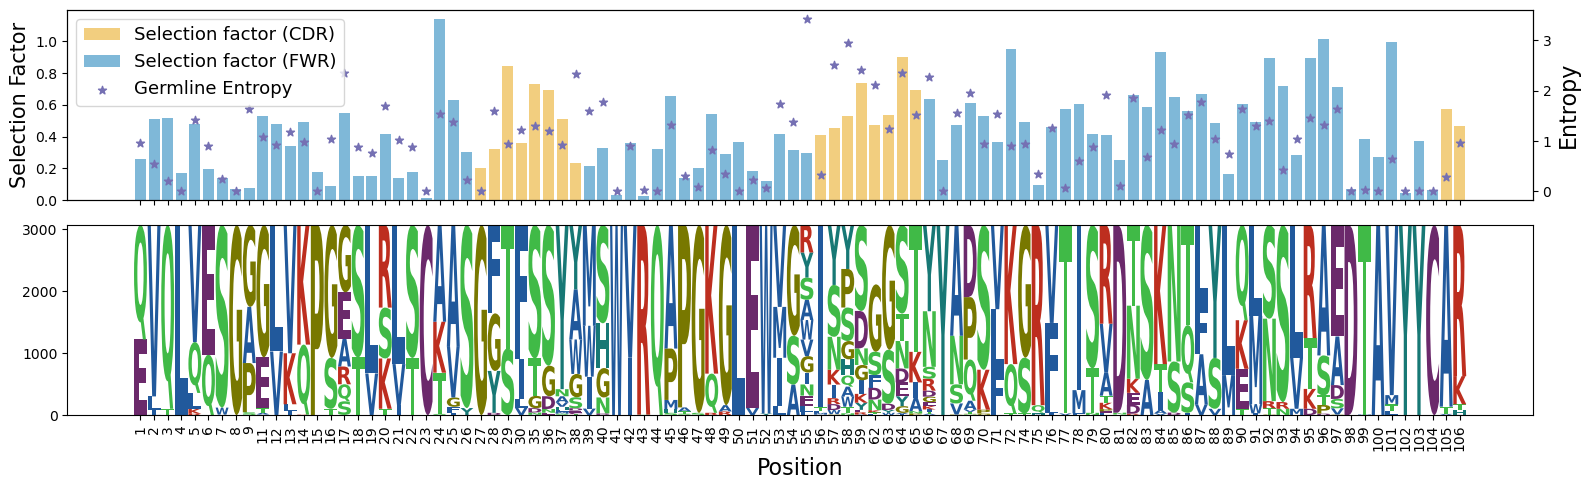

In [39]:
def plot_compare_entropy_and_sf(compare_df, count_matrix):
    palette = sns.color_palette("Dark2", 3)
    entropy_color = palette[2]

    fig, axs = plt.subplots(2, 1, figsize=(16, 5), sharex=True)

    # Create a primary y-axis for median selection factor
    axs[0].set_ylabel("Selection Factor", size=15)
    ax2 = axs[0].twinx()
    ax2.set_ylabel("Entropy", size=16)

    plot_df = compare_df.reset_index(drop=True)

    region_label = {True: "CDR", False: "FWR"}
    for is_cdr in [True, False]:
        subset = plot_df[plot_df['is_cdr'] == is_cdr]
        axs[0].bar(subset.index, subset['median_selection_factor'], color=region_color[region_label[is_cdr]], alpha=0.5, label=f'Selection factor ({region_label[is_cdr]})')

    # Plot germline entropy as a scatter plot
    ax2.scatter(plot_df.index, plot_df['entropy'], color=entropy_color, marker='*', label='Germline Entropy')

    # Combine legends
    lines_1, labels_1 = axs[0].get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    # Logo plot
    logo = logomaker.Logo(count_matrix.reset_index(drop=True), ax=axs[1], color_scheme='NajafabadiEtAl2017')
    axs[1].set_xticks(range(len(plot_df)))
    axs[1].set_xticklabels(compare_df.index)
    axs[1].tick_params(axis='x', rotation=90)
    axs[1].set_xlabel("Position", size=16)

    plt.tight_layout()

    return fig

compare_df, count_matrix = compare_df_and_count_matrix_of(complete_plotter, germline_df)
fig = plot_compare_entropy_and_sf(compare_df, count_matrix)

fig.savefig(f"{figures_dir}/compare_entropy_and_sf.svg")

In [40]:
complete_plotter.pcp_df["v_family"].value_counts()

v_family
IGHV3    9983
IGHV4    5246
IGHV1    4328
IGHV5     944
IGHV2     771
IGHV6     351
IGHV7     129
Name: count, dtype: int64

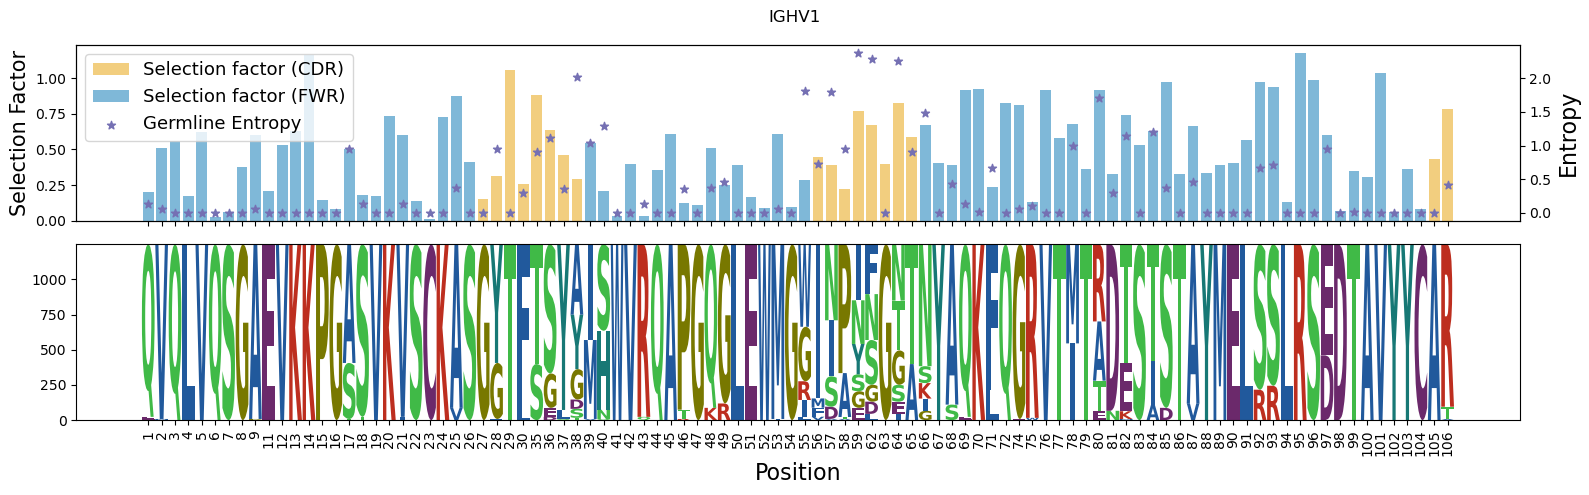

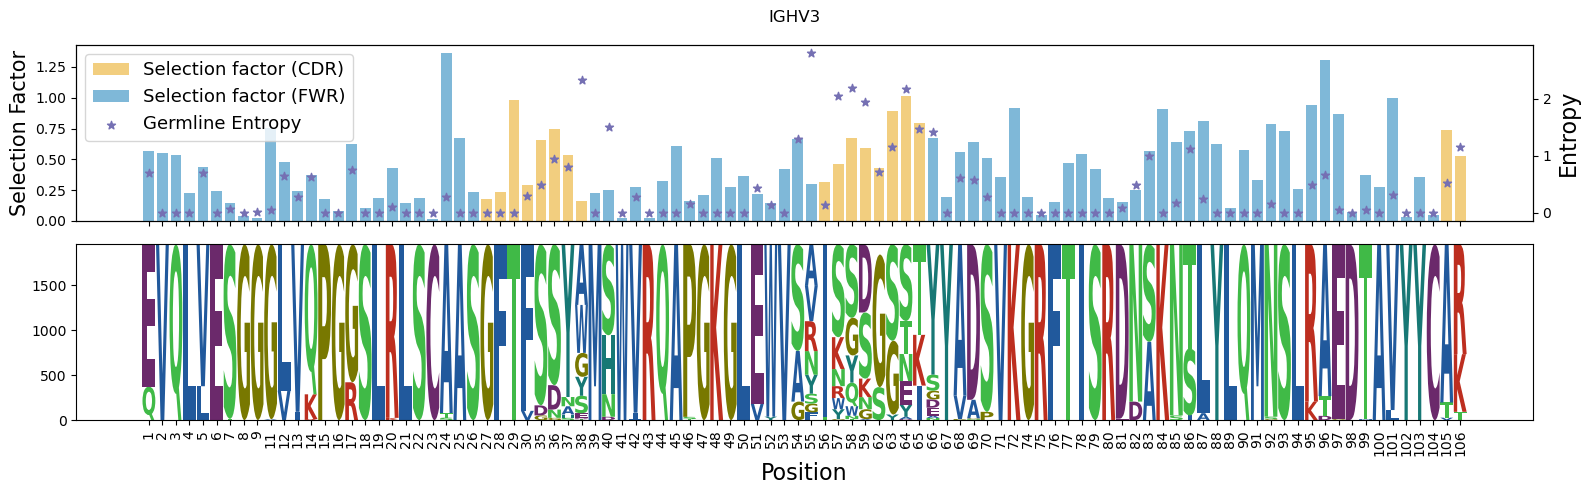

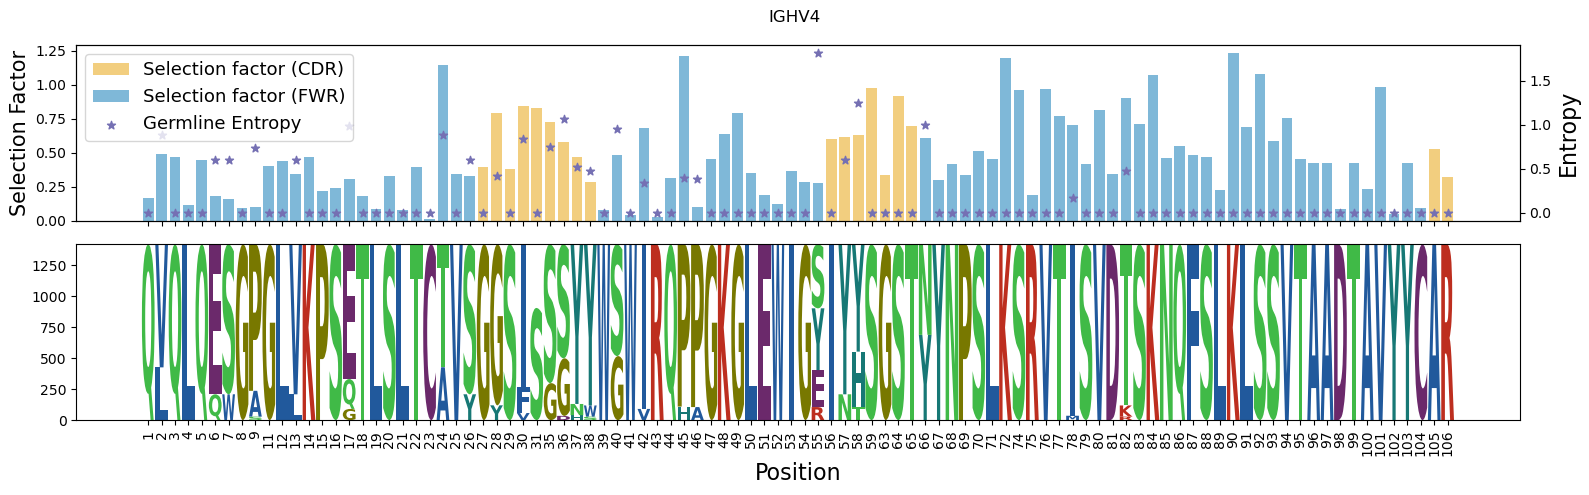

In [41]:
for family, sub_plotter in plotter_dict.items():
    sub_compare_df, sub_count_matrix = compare_df_and_count_matrix_of(sub_plotter, germline_df)
    fig = plot_compare_entropy_and_sf(sub_compare_df, sub_count_matrix)
    fig.suptitle(family)
    plt.tight_layout()

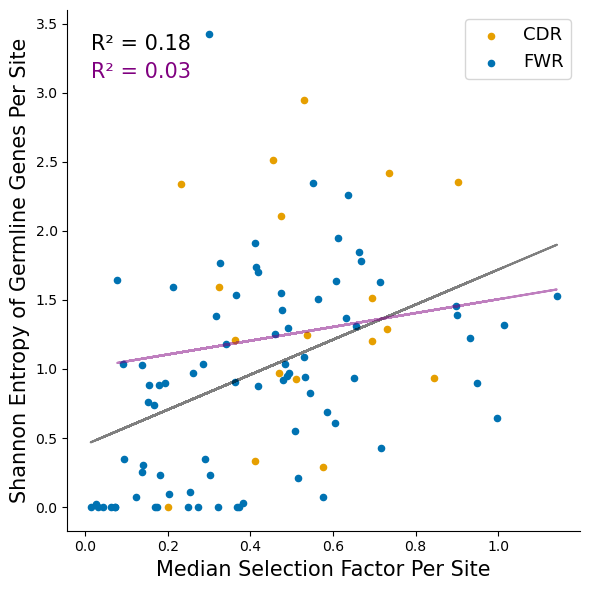

In [42]:
def plot_scatter_sf_vs_quantity(compare_df, ax, quantity):
    df = compare_df.reset_index()

    # Define color palette
    is_cdr_color = {False: "#0072B2", True: "#E69F00"}

    # Plot points
    region_label = {True: "CDR", False: "FWR"}
    for is_cdr in [True, False]:
        subset = df[df['is_cdr'] == is_cdr]
        ax.scatter(subset['median_selection_factor'], subset[quantity], 
            color=is_cdr_color[is_cdr], label=f'{region_label[is_cdr]}', s=20)

    def regression_line(reg_df, color):
        # Linear regression to get R2 value
        X = reg_df[['median_selection_factor']].values
        y = reg_df[quantity].values

        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)
        r2 = r2_score(y, y_pred)

        # Plot regression line
        ax.plot(X[:, 0], y_pred, color=color, alpha=0.5)

        return r2

    r2 = regression_line(df, color='black')
    sub_df = df[df[quantity] > 0.2]
    sub_r2 = regression_line(sub_df, color='purple')

    text_x = df['median_selection_factor'].min() 
    text_y = df[quantity].max()
    ax.text(text_x, text_y, f'R² = {r2:.2f}', verticalalignment='top', size=15)
    ax.text(text_x, text_y*0.94, f'R² = {sub_r2:.2f}', verticalalignment='top', color='purple', size=15)

    ax.set_xlabel('Median Selection Factor Per Site', size=15)
    if quantity == "entropy":
        ax.set_ylabel('Shannon Entropy of Germline Genes Per Site', size=15)
    elif quantity == "diversity":
        ax.set_ylabel('Hill Diversity of Germline Genes Per Site', size=15)
    else:
        raise ValueError(f"Unknown quantity: {quantity}")
    ax.legend()

    sns.despine()
    plt.tight_layout()

fig, ax = plt.subplots(figsize=(6, 6))
plot_scatter_sf_vs_quantity(compare_df, ax, "entropy")
fig.savefig(f"{figures_dir}/scatter_sf_vs_entropy.svg")

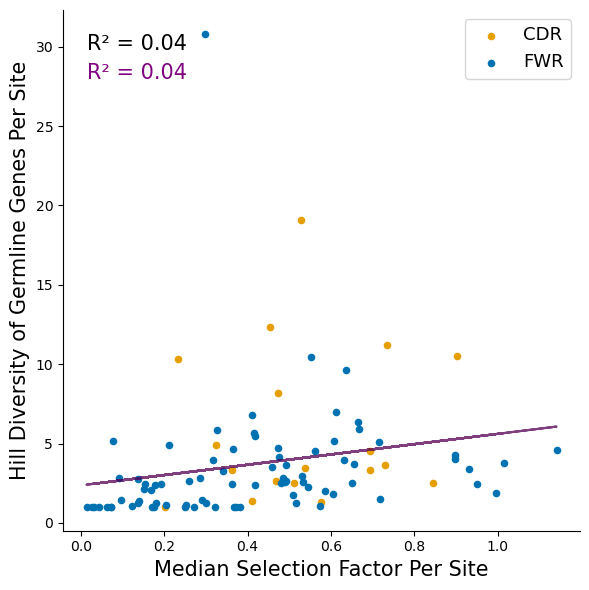

In [43]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_scatter_sf_vs_quantity(compare_df, ax, "diversity")

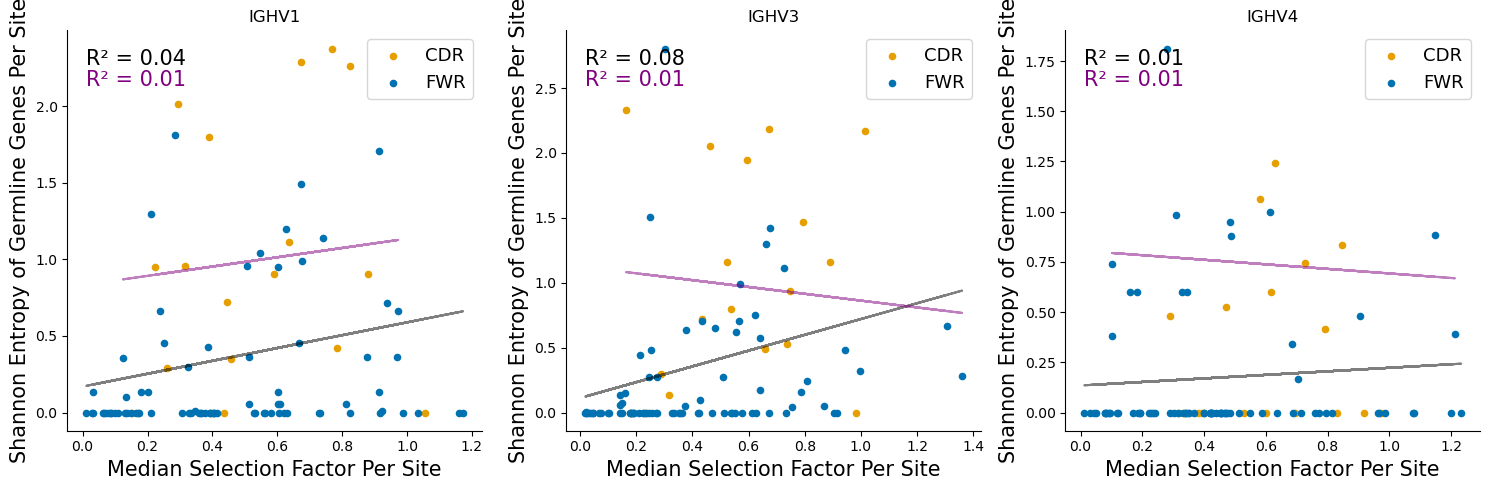

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for idx, (family, sub_plotter) in enumerate(plotter_dict.items()):
    sub_compare_df, _ = compare_df_and_count_matrix_of(sub_plotter, germline_df)
    plot_scatter_sf_vs_quantity(sub_compare_df, axs[idx], "entropy")
    axs[idx].set_title(family)

In [45]:
def alt_scatter_sf_vs_entropy(compare_df, count_matrix):
    # Create a DataFrame with the site, most frequent amino acid, and entropy
    most_freq_aa_by_site = count_matrix.idxmax(axis=1)
    compare_df['most_freq_aa'] = most_freq_aa_by_site

    # Create Altair scatter plot with tooltips
    alt_chart = alt.Chart(compare_df.reset_index()).mark_circle(size=60).encode(
        x=alt.X('median_selection_factor', title='Median Selection Factor'),
        y=alt.Y('entropy', title='Shannon Entropy'),
        color=alt.Color('is_cdr'),
        tooltip=['site', 'most_freq_aa']
    ).properties(
        title='Scatter plot of Median Selection Factor vs Shannon Entropy',
        width=600,
        height=400
    )

    return alt_chart

alt_chart = alt_scatter_sf_vs_entropy(compare_df, count_matrix)
alt_chart.display()

alt.Chart(...)